# <font color="#1B365C">Um caminho para os melhores salários</font>
<hr color="#F5F5F5" size="1">


<img align="right" width="320" height="320" src="https://img.freepik.com/free-vector/business-innovation-based-alternative-financial-services-digital-currency-market-exchange-financial-technology-flat-vector-illustration-fintech-startup-economy-finances-concept-banner_74855-22404.jpg?t=st=1657313175~exp=1657313775~hmac=718b1c06309613493e585df5fbf1927b97c4eb790273d37c9d213311800a601a&w=996">

**Introdução**

Nos últimos anos, um movimento no mercado de trabalho tem chamado a atenção: o aumento da demanda por profissionais da área de dados. Bastam poucos minutos de pesquisa na internet para confirmar o fenômeno.

Mas diante de tantas oportunidades e ofertas de emprego, muito se especula sobre a remuneração oferecida neste mercado. Promessas de altos salários em pouco tempo podem confundir quem está pensando em começar nesta carreira ou até mudar de área. 

O objetivo deste estudo é entender quais características dos profissionais podem ter alguma relação com a remuneração. Este exame pode servir como ferramenta auxiliar na decisão de futuros profissionais e pessoas que estão interessadas em mudar de carreira, revelando, através dos dados, **um caminho para os melhores salários**.

Para isso, analisei de perto a mais completa pesquisa sobre o tema, a <font color="#1B365C"><b>State of Data 2021</b></font>, que foi realizada em um esforço conjunto da *Data Hackers*, a maior comunidade de dados do Brasil, e da consultoria global *Bain & Company*.

<hr color="#F5F5F5" size="1">

**Calculadora de Faixa Salarial:**
- Próximo ao final deste documento, disponibilizei uma 'Calculadora de Faixa Salarial' (algoritmo de *Machine Learning*) com base nos dados da pesquisa State of Data 2021 

**Divisão do estudo:**
- Dados demográficos
- Dados sobre o trabalho na área de dados
- Dados sobre conhecimentos técnicos

**Objeto do Estudo**
- Entender quais características dos profissionais podem ter alguma relação com a remuneração.
- Variável: ('P2_h ', 'Faixa salarial')

**Fontes**
- State of Data 2021: Pesquisa foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021
- Fonte da pesquisa: www.stateofdata.com.br 
- Fonte dos dados 2021: https://www.kaggle.com/datasets/datahackers/state-of-data-2021
- Fonte dos dados 2019: https://www.kaggle.com/datasets/datahackers/pesquisa-data-hackers-2019


#### Preparação dos dados e informações iniciais
*Para melhor visualização desta análise, vou deixar os códigos em Python e alguns resultados de forma oculta. <br>
Fique a vontade para expandí-los quando achar necessário ou copiar/salvar este notebook para estudá-lo posteriormente.*

In [1]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd 
import re
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

# Configurações Gerais
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cores padrão
other_color = ['#EDEDED'] # cinza
max_color0 = ['#EE442F'] # laranja
max_color1 = ['#63ACBE'] # azul
paleta_dupla = max_color0 + max_color1

# DataFrame
df = pd.read_csv('/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv', low_memory=False)

# Classe para criação dos gráficos
class Grafico:
        
    def __init__(self, configuracao_grafico):
        self.__config_grafico = configuracao_grafico # dicionário com as configurações dos gráficos
        
        # Configuração da Figura e dos Gráficos
        sns.set_style("ticks", {"grid.linestyle": ":", 'axes.edgecolor': '#808080', 'xtick.color': '#808080', 'ytick.color': '#808080'})
        self.__figura, self.__graficos = plt.subplots(self.__config_grafico['figura']['linhas'], self.__config_grafico['figura']['colunas'], gridspec_kw={'width_ratios': self.__config_grafico['figura']['proporcao']}, figsize=self.__config_grafico['figura']['tamanho'], tight_layout=True)
        
        # Título e subtítulo do gráfico
        self.__figura.suptitle(self.__config_grafico['titulo'], x=0.01, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 16)
        self.__figura.text(0.01, 0.945, self.__config_grafico['subtitulo'], horizontalalignment='left', verticalalignment='top', color="#656565", fontstyle="italic", fontsize = 14)
  
        sns.despine();
          
    def grafico_contagem(self, config_grafico, numero_grafico): 
        ax = sns.countplot(data=config_grafico['data'], x=config_grafico['eixo_x'], palette=self.set_cores_paleta(0, config_grafico['paleta_cores']), order=config_grafico['ordem'], ax=self.__graficos[numero_grafico])
        ax.set_title(config_grafico['titulo'], fontsize=13, loc='left')
        ax.set(xlabel=config_grafico['rotulo_x'], ylabel=config_grafico['rotulo_y'])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=config_grafico['rotacao_texto_x'])
        # anotação
        ax.text(config_grafico['coord_anotacao_x'], config_grafico['coord_anotacao_y'], config_grafico['anotacao'], ha="left", va="center", size=10)
        
    
    def grafico_caixas(self, config_grafico, numero_grafico): 
        ax = sns.boxplot(data=config_grafico['data'], y=config_grafico['eixo_y'], x=config_grafico['eixo_x'], 
                         palette=self.set_cores_paleta(1, config_grafico['paleta_cores']), 
                         order=config_grafico['ordem'], showfliers = False, 
                         medianprops=dict(color="#1B365C", alpha=0.9), boxprops=dict(edgecolor='#dddddd'), whiskerprops=dict(color='#dddddd'), capprops=dict(color='#dddddd'), ax=self.__graficos[numero_grafico])
        ax.set_title(config_grafico['titulo'], fontsize=13, loc='left')
        ax.set(xlabel=config_grafico['rotulo_x'], ylabel=config_grafico['rotulo_y'])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=config_grafico['rotacao_texto_x'])
        
        
        # anotação
        ax.annotate(config_grafico['anotacao'], 
                      xy=(config_grafico['coord_anotacao_xy']), xycoords='data',
                      xytext=(config_grafico['coord_anotacao_seta']), textcoords='data',
                      size=10, va="center", ha="left", color='black',
                      arrowprops=dict(arrowstyle="-|>",
                                      connectionstyle="arc3,rad=0.3",
                                      color='#dddddd'))

        # linha média/mediana
        ax.axhline(6, color='#656565', linestyle=':')        
        ax.text(config_grafico['coord_linha_media_x'], config_grafico['coord_linha_media_y'], f"Média geral\nR\$$ 6.000 \  a \  R\$$ 8.000", ha="left", va="center", size=9, color="#656565")
        
        plt.xlim(config_grafico['limite_x'])
        plt.ylim(config_grafico['limite_y'])
        
    
    def grafico_barras(self, config_grafico, numero_grafico):
        ax = sns.barplot(data=config_grafico['data'], x=config_grafico['eixo_x'], y=config_grafico['eixo_y'], palette=config_grafico['paleta_cores'], ax=self.__graficos[numero_grafico])
        ax.set_title(config_grafico['titulo'], fontsize=13, loc='left')
        ax.set(xlabel=config_grafico['rotulo_x'], ylabel=config_grafico['rotulo_y'])
        ax.set(xticklabels = (config_grafico['rotulo_texto_x']))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=config_grafico['rotacao_texto_x'])
        ax.text(config_grafico['coord_anotacao_x'], config_grafico['coord_anotacao_y'], config_grafico['anotacao'], ha="left", va="center", size=10)
 
 
    def grafico_contagem_comparacao(self, config_grafico, numero_grafico): 
        ax = sns.countplot(data=config_grafico['data'], x=config_grafico['eixo_x'], palette=config_grafico['paleta_cores'], ax=self.__graficos[numero_grafico])
        ax.set_title(config_grafico['titulo'], fontsize=13, loc='left')
        ax.set(xlabel=config_grafico['rotulo_x'], ylabel=config_grafico['rotulo_y'])
        ax.set(xticklabels = (config_grafico['rotulo_tick_x']))
        
    
    def grafico_caixas_comparacao(self, config_grafico, numero_grafico): 
        ax = sns.boxplot(data=config_grafico['data'], x=config_grafico['eixo_x'], y=config_grafico['eixo_y'], 
                         palette=config_grafico['paleta_cores'], showfliers = False, 
                         medianprops=dict(color="#1B365C", alpha=0.9), boxprops=dict(edgecolor='#dddddd'), whiskerprops=dict(color='#dddddd'), capprops=dict(color='#dddddd'), 
                         ax=self.__graficos[numero_grafico])
        ax.set_title(config_grafico['titulo'], fontsize=13, loc='left')
        ax.set(xlabel=config_grafico['rotulo_x'], ylabel=config_grafico['rotulo_y'])
        ax.set(xticklabels = (config_grafico['rotulo_tick_x']))
        # linha média/mediana
        ax.axhline(6, color='#656565', linestyle=':')

    def grafico_texto(self, texto, numero_grafico):
        ax = plt.text(0.1, 1, texto, horizontalalignment='center', verticalalignment='center', transform=self.__graficos[numero_grafico].transAxes)
        plt.axis('off')
        

    
    def set_cores_paleta(self, numero_grafico, series):
        max_val = series.max()
        pal = []
        other_color = '#EDEDED'
        
        if numero_grafico == 0:
            max_color = '#EE442F'
        else:
            max_color = '#63ACBE'


        for item in series:
            if item == max_val:
                pal.append(max_color)
            else:
                pal.append(other_color)
        return pal


### <font color="#1B365C">"Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?"</font>
Esta pergunta, realizada na pesquisa State of Data 2021, aponta que mais de <font color="#1B365C"><b>70%</b></font> dos entrevistados levam em consideração a Remuneração/Salário no momento de decidir onde trabalhar.


<!-- df["('P2_o_a ', 'Remuneração/Salário')"].value_counts(normalize=True)*100 -->

# <font color="#1B365C">Faixa Salarial</font>
  
  <p>Nesta análise, utilizarei a variável Faixa Salarial <i>('P2_h ', 'Faixa salarial')</i> como objeto de estudo em comparação com outros campos para entender quais características dos profissionais podem ter alguma relação com a remuneração.</p>
  <p>A tabela a seguir servirá como referência para todos os gráficos deste estudo. Ao lado da tabela, está um gráfico do tipo <i>boxplot</i> que, dentre outras características, nos mostra a faixa salarial máxima, média e mínima, de acordo com o objeto de comparação.

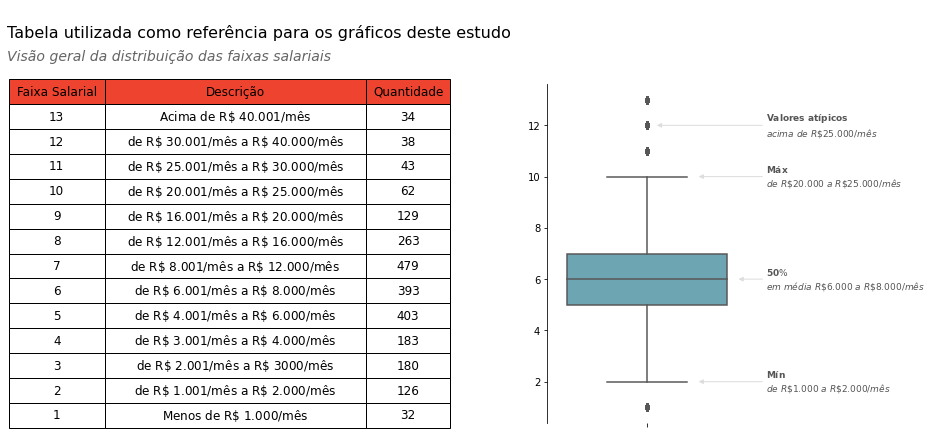

In [2]:
# Codificando as faixas salariais para numérico
dicio_faixa_salarial = dict()
dicio_faixa_salarial = {
                            "Menos de R$ 1.000/mês" : 1,
                            "de R$ 1.001/mês a R$ 2.000/mês" : 2,
                            "de R$ 2.001/mês a R$ 3000/mês" : 3,
                            "de R$ 3.001/mês a R$ 4.000/mês" : 4,
                            "de R$ 4.001/mês a R$ 6.000/mês" : 5,
                            "de R$ 6.001/mês a R$ 8.000/mês" : 6,
                            "de R$ 8.001/mês a R$ 12.000/mês" : 7,
                            "de R$ 12.001/mês a R$ 16.000/mês" : 8,
                            "de R$ 16.001/mês a R$ 20.000/mês" : 9,
                            "de R$ 20.001/mês a R$ 25.000/mês" : 10,
                            "de R$ 25.001/mês a R$ 30.000/mês" : 11,
                            "de R$ 30.001/mês a R$ 40.000/mês" : 12,
                            "Acima de R$ 40.001/mês" : 13
                            }

# Criando uma nova coluna e mapeando com o dicionário 'dicio_faixa_salarial'
df["faixa_salarial"] = df["('P2_h ', 'Faixa salarial')"].map(dicio_faixa_salarial)

# Atualizando os NaN com 0
df["faixa_salarial"] = df["faixa_salarial"].fillna(0).astype(np.int64)

# Removendo do dataframe as linhas que não possuem faixa salarial informada
df = df.loc[df["faixa_salarial"] != 0, :]

# DataFrame contendo os dados e descrição das faixas salariais 
dfFaixaSalarial = df[["faixa_salarial", "('P2_h ', 'Faixa salarial')"]].value_counts().to_frame().reset_index()
dfFaixaSalarial["('P2_h ', 'Faixa salarial')"] = dfFaixaSalarial["('P2_h ', 'Faixa salarial')"].str.replace('$', '$\$$', regex=True)
dfFaixaSalarial.columns = ['Faixa Salarial','Descrição','Quantidade']
dfFaixaSalarial = dfFaixaSalarial.sort_values(by=["Faixa Salarial"], ascending=False)


# Tabela utilizada como referência para os gráficos objetos de análise

figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(13,6), tight_layout=True)

figura.suptitle("\nTabela utilizada como referência para os gráficos deste estudo\n",  x=0.01, y=1, horizontalalignment='left', verticalalignment='top', fontsize=16)
figura.text(0.01, 0.9, "Visão geral da distribuição das faixas salariais\n", horizontalalignment='left', verticalalignment='top', color="#656565", fontstyle="italic", fontsize = 14)

# tabela
graficos[0].axis('off')
graficos[0].axis('tight')
table = graficos[0].table(cellText=dfFaixaSalarial.values, colLabels=dfFaixaSalarial.columns, cellLoc='center', loc='left', colColours =max_color0 * 3)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(dfFaixaSalarial.columns)))) 
table.scale(3,2) 

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", color='#63ACBE', ax=graficos[1])
ax.set(xlabel='', ylabel='')


# setas
ax.annotate('$\\bfValores \ atípicos$\n$\\itacima \ de \ R\$ 25.000/mês$ ', xy=(0.04, 12), xycoords='data',
            xytext=(0.6, 12), textcoords='data',
            size=9, va="center", ha="left", color='#555555',
            arrowprops=dict(arrowstyle="-|>",
                              connectionstyle="arc3",
                              color='#dddddd'),
           )

ax.annotate('$\\bfMáx$\n$\\itde \ R\$ 20.000 \ a \ R\$ 25.000 /mês$ ', xy=(0.25, 10), xycoords='data',
            xytext=(0.6, 10), textcoords='data',
            size=9, va="center", ha="left", color='#555555',
            arrowprops=dict(arrowstyle="-|>",
                              connectionstyle="arc3",
                              color='#dddddd'),
           )

ax.annotate('$\\bf50 $%\n$\\item \ média \ R\$ 6.000 \ a \ R\$ 8.000 /mês$ ', xy=(0.45, 6), xycoords='data',
            xytext=(0.6, 6), textcoords='data',
            size=9, va="center", ha="left", color='#555555',
            arrowprops=dict(arrowstyle="-|>",
                              connectionstyle="arc3",
                              color='#dddddd'),
           )

ax.annotate('$\\bfMín$\n$\\itde \ R\$ 1.000 \ a \ R\$ 2.000 /mês$ ', xy=(0.25, 2), xycoords='data',
            xytext=(0.6, 2), textcoords='data',
            size=9, va="center", ha="left", color='#555555',
            arrowprops=dict(arrowstyle="-|>",
                              connectionstyle="arc3",
                              color='#dddddd'),
           )


sns.despine(bottom=True)



# <font color="#1B365C">Comparação das faixas salariais das pesquisas de 2019 e 2021</font>
 Em comparação com a pesquisa *State of Data do ano de 2019*, houve uma alta da média salarial dos profissionais da área de dados. Conforme os gráficos a seguir, em 2021 houve um aumento do número de pessoas a partir das faixas salariais que receberam acima de R$ 6.000,00 a 8.000,00 por mês.  
 De acordo com o IBGE, a inflação (IPCA) no período de 01/2019 a 12/2021 foi de <font color="#1B365C"><b>19,99%</b></font>.    
 No entanto, houve um aumento de aproximadamente <font color="#1B365C"><b>40%</b></font> na média salarial de 2019 para 2021 para os profissionais da área de dados.

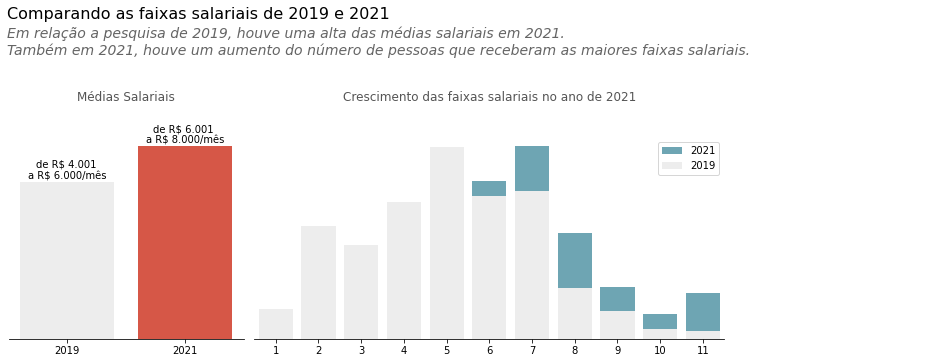

In [3]:
# DataFrame da Pesquisa State of Data de 2019
df2019 = pd.read_csv('/kaggle/input/pesquisa-data-hackers-2019/datahackers-survey-2019-anonymous-responses.csv', low_memory=False)

# Codificando as faixas salariais para numérico
dicio_faixa_salarial_2019 = dict()
dicio_faixa_salarial_2019 = {
                            "Menos de R$ 1.000/mês" : 1,
                            "de R$ 1.001/mês a R$ 2.000/mês" : 2,
                            "de R$ 2.001/mês a R$ 3000/mês" : 3,
                            "de R$ 3.001/mês a R$ 4.000/mês" : 4,
                            "de R$ 4.001/mês a R$ 6.000/mês" : 5,
                            "de R$ 6.001/mês a R$ 8.000/mês" : 6,
                            "de R$ 8.001/mês a R$ 12.000/mês" : 7,
                            "de R$ 12.001/mês a R$ 16.000/mês" : 8,
                            "de R$ 16.001/mês a R$ 20.000/mês" : 9,
                            "de R$ 20.001/mês a R$ 25.000/mês" : 10,
                            "Acima de R$ 25.001/mês" : 11
                            }

# Criando uma nova coluna e mapeando com o dicionário 'dicio_faixa_salarial'
df2019["2019"] = df2019["('P16', 'salary_range')"].map(dicio_faixa_salarial_2019)

# Atualizando os NaN com 0
df2019["2019"] = df2019["2019"].fillna(0).astype(np.int64)

# Removendo do dataframe as linhas que não possuem faixa salarial informada
df2019 = df2019.loc[df2019["2019"] != 0, :]


media2019 = df2019["2019"].mean()
df2019 = pd.DataFrame(df2019["2019"])
df2021 = pd.DataFrame(df["faixa_salarial"].reset_index(drop=True))

# ajustando a tabela das faixas salariais de 2021 para deixar igual a de 2019
lista_faixa = []
for count, faixa in enumerate(df2021["faixa_salarial"]):
    if int(faixa) > 10:
        lista_faixa.append(11)
    else:
        lista_faixa.append(int(df2021["faixa_salarial"][count]))
df2021["2021"] = lista_faixa

# Normalizando os dois anos
df2019 = df2019["2019"].value_counts(normalize = True).sort_index() * 100
df2019 = pd.DataFrame({'nr_faixa':df2019.index, 'vl_faixa':df2019.values})
df2019["ano"] = 2019

df2021 = df2021["2021"].value_counts(normalize = True).sort_index() * 100
df2021 = pd.DataFrame({'nr_faixa':df2021.index, 'vl_faixa':df2021.values})
df2021["ano"] = 2021

#Concatenando os DataFrames de 2019 e 2021
df_19_21 = pd.concat([df2019, df2021])
df_19_21 = df_19_21.reset_index(drop=True)



# Gráfico: Comparando as faixas salariais de 2019 e 2021

figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 0.8]}, figsize=(13,5), tight_layout=True)

titulo = "Comparando as faixas salariais de 2019 e 2021\n"
subtitulo = "Em relação a pesquisa de 2019, houve uma alta das médias salariais em 2021.\nTambém em 2021, houve um aumento do número de pessoas que receberam as maiores faixas salariais."
tit_graf1 = "\n\nMédias Salariais\n\n"
tit_graf2 = "\n\nCrescimento das faixas salariais no ano de 2021\n\n"
media2021 = df["faixa_salarial"].mean()
texto_explicativo = f""

ano = ['2019', '2021']
media = [media2019, media2021]



# Título e subtítulo do gráfico
figura.suptitle(titulo, x=0.01, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 16)
figura.text(0.01, 0.945, subtitulo, horizontalalignment='left', verticalalignment='top', color="#656565", fontstyle="italic", fontsize = 14)

# barplot1
ax = sns.barplot(x=ano, y=media, palette=other_color + max_color0, ax=graficos[0])
ax.bar_label(ax.containers[0], labels=['de R$ 4.001 \na R$ 6.000/mês','de R$ 6.001 \na R$ 8.000/mês'], padding=1)
ax.get_yaxis().set_ticks([])
ax.set_title(tit_graf1, fontsize=12, color="#555555")

# barplot2
ax = sns.barplot(x=df_19_21.loc[(df_19_21["ano"] == 2021), "nr_faixa"], y=df_19_21.loc[(df_19_21["ano"] == 2021), "vl_faixa"], color="#63ACBE", label='2021', ax=graficos[1])
ax = sns.barplot(x=df_19_21.loc[(df_19_21["ano"] == 2019), "nr_faixa"], y=df_19_21.loc[(df_19_21["ano"] == 2019), "vl_faixa"], color="#EDEDED", label='2019', ax=graficos[1])
ax.set(xlabel='', ylabel='')
ax.get_yaxis().set_ticks([])
ax.legend(loc="upper right")
ax.set_title(tit_graf2, fontsize=12, color="#555555")

# texto
ax = plt.text(0.1, 1, texto_explicativo, horizontalalignment='left', verticalalignment='center', fontsize = 12, transform=graficos[2].transAxes)
plt.axis('off')

#plt.xlim(-0.6, 9)
#plt.ylim(0, 13)
sns.despine(left=True)



# <font color="#1B365C">Dados demográficos</font>


## Faixa Etária
A maioria dos profissionais que responderam a pesquisa têm entre 25 e 29 anos de idade. Os dados do gráfico abaixo nos mostram que as maiores remunerações foram para as pessoas que têm entre 45 e 49 anos. Por certo, a idade em si não tem relação com o recebimento de maiores salários, mas sim o nível de experiência, como veremos mais adiante.

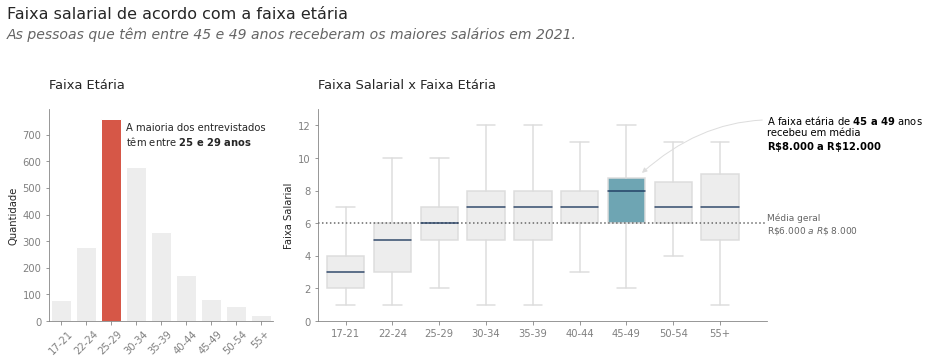

In [4]:
# Gráfico: Faixa Idade

eixo_x = "('P1_a_a ', 'Faixa idade')"
eixo_y = "faixa_salarial"
ordem = df[eixo_x].value_counts().sort_index().index.to_list()
df_agrupado = df.groupby(eixo_x).mean().sort_index()

config_faixa_idade = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com a faixa etária\n\n",
                'subtitulo': "As pessoas que têm entre 45 e 49 anos receberam os maiores salários em 2021."}

faixa_idade_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Faixa Etária \n",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 45,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 2.6,
                  'coord_anotacao_y': 700,
                  'anotacao': f"A maioria dos entrevistados \ntêm entre $\\bf25 \ e \ 29 \ anos$ "}

faixa_idade_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Faixa Etária \n", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 0,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (6.3, 9),
                  'coord_anotacao_seta': (9, 11.5),
                  'anotacao': f"A faixa etária de $\\bf 45 \ a \ 49$ anos \nrecebeu em média\n$\\bfR\$ 8.000 \ a \  R\$ 12.000$",
                  'coord_linha_media_x': 9,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 9),
                  'limite_y': (0, 13)}



grafico_faixa_idade = Grafico(config_faixa_idade)
grafico_faixa_idade.grafico_contagem(faixa_idade_contagem, 0)
grafico_faixa_idade.grafico_caixas(faixa_idade_caixas, 1)




## Sexo

Na pesquisa, a quantidade de profissionais do sexo masculino foi superior ao feminino. Apesar da mediana (valor que separa a metade maior e a metade menor de uma amostra) ser igual para ambos os sexos, observa-se que os homens puderam alcançar salários maiores.

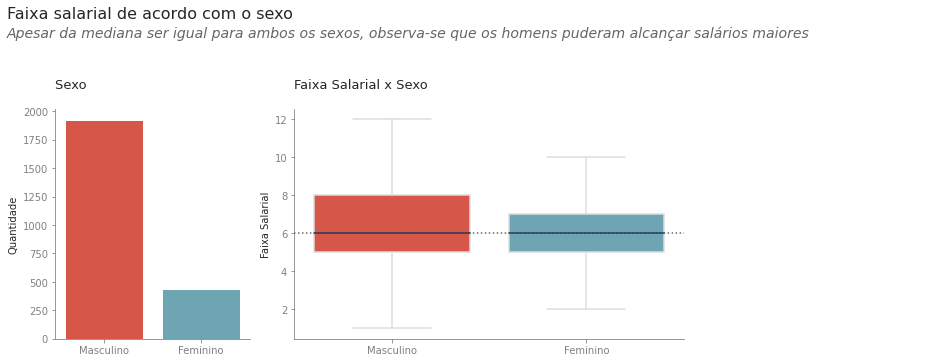

In [5]:
# Gráfico: Sexo


eixo_x = "('P1_b ', 'Genero')"
eixo_y = "faixa_salarial"


config_sexo = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [1,2,1], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com o sexo\n\n",
                'subtitulo': "Apesar da mediana ser igual para ambos os sexos, observa-se que os homens puderam alcançar salários maiores"}

sexo_contagem = {'data': df[df["('P1_b ', 'Genero')"] != 'Outro'],
            'eixo_x': eixo_x,
            'eixo_y': eixo_y,
            'paleta_cores': paleta_dupla,
            'titulo': "Sexo \n",
            'rotulo_x': '',
            'rotulo_y': 'Quantidade',
            'rotulo_tick_x': ['Masculino', 'Feminino']
            }

sexo_caixas = {'data': df[df["('P1_b ', 'Genero')"] != 'Outro'],
           'eixo_x': eixo_x,
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x Sexo \n", 
           'paleta_cores': paleta_dupla,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Masculino', 'Feminino']}





grafico_sexo = Grafico(config_sexo)
grafico_sexo.grafico_contagem_comparacao(sexo_contagem, 0)
grafico_sexo.grafico_caixas_comparacao(sexo_caixas, 1)
grafico_sexo.grafico_texto('',2)

## Região onde mora

A grande maioria dos profissionais que responderam a pesquisa moram na região Sudeste do Brasil. Porém, como mostra o gráfico abaixo, os maiores salários foram pagos para quem reside no Exterior. Dentre as regiões do Brasil, as pessoas que moram no Centro-Oeste receberam os maiores salários.

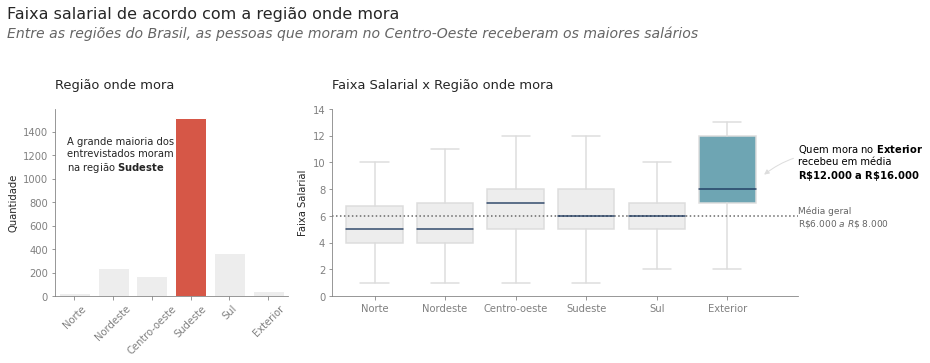

In [6]:
# Gráfico: Região onde mora

eixo_x = "('P1_e_b ', 'Regiao onde mora')"
eixo_y = "faixa_salarial"
ordem = ['Norte','Nordeste','Centro-oeste','Sudeste','Sul','Exterior']
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_regiao = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com a região onde mora\n\n",
                'subtitulo': "Entre as regiões do Brasil, as pessoas que moram no Centro-Oeste receberam os maiores salários"}

regiao_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Região onde mora \n",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 45,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': -0.2,
                  'coord_anotacao_y': 1200,
                  'anotacao': f"A grande maioria dos\nentrevistados moram\nna região $\\bfSudeste$ "}

regiao_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Região onde mora \n", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 0,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (5.5, 9),
                  'coord_anotacao_seta': (6, 10),
                  'anotacao': f"Quem mora no $\\bfExterior$ \nrecebeu em média\n$\\bfR\$ 12.000 \ a \  R\$ 16.000$",
                  'coord_linha_media_x': 6,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 6),
                  'limite_y': (0, 14)}



grafico_regiao = Grafico(config_regiao)
grafico_regiao.grafico_contagem(regiao_contagem, 0)
grafico_regiao.grafico_caixas(regiao_caixas, 1)



## Graduação

Os profissionais que não possuem graduação formal receberam salários muitas vezes superiores aos que possuem graduação ou bacharelado na área. Observa-se também que os salários foram superiores para profissionais que possuem Pós-graduação/Mestrado/Doutorado.

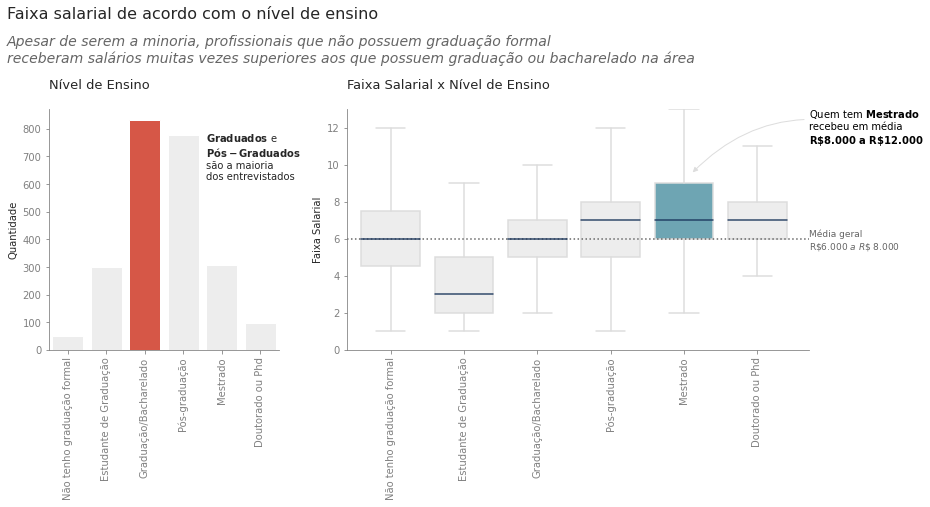

In [7]:
# Gráfico: Graduação


eixo_x = "('P1_h ', 'Nivel de Ensino')"
eixo_y = "faixa_salarial"
ordem = ['Não tenho graduação formal','Estudante de Graduação','Graduação/Bacharelado','Pós-graduação','Mestrado','Doutorado ou Phd']
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_graduacao = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,7)},
                'titulo': "Faixa salarial de acordo com o nível de ensino\n\n",
                'subtitulo': "Apesar de serem a minoria, profissionais que não possuem graduação formal \nreceberam salários muitas vezes superiores aos que possuem graduação ou bacharelado na área\n"}

graduacao_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Nível de Ensino \n",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 3.6,
                  'coord_anotacao_y': 700,
                  'anotacao': f"$\\bfGraduados$ e \n$\\bfPós-Graduados$ \nsão a maioria \ndos entrevistados"}

graduacao_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Nível de Ensino \n", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (4.1, 9.5),
                  'coord_anotacao_seta': (5.7, 12),
                  'anotacao': f"Quem tem $\\bfMestrado$ \nrecebeu em média\n$\\bfR\$ 8.000 \ a \  R\$ 12.000$",
                  'coord_linha_media_x': 5.7,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 5.7),
                  'limite_y': (0, 13)}



grafico_graduacao = Grafico(config_graduacao)
grafico_graduacao.grafico_contagem(graduacao_contagem, 0)
grafico_graduacao.grafico_caixas(graduacao_caixas, 1)



# <font color="#1B365C">Dados sobre o trabalho na área de dados</font>

## Situação atual de trabalho
A grande maioria dos entrevistados trabalha atualmente no regime CLT. Contudo, as outras situações de trabalho, como empregado PJ ou Freelancer, alcançaram maiores salários.

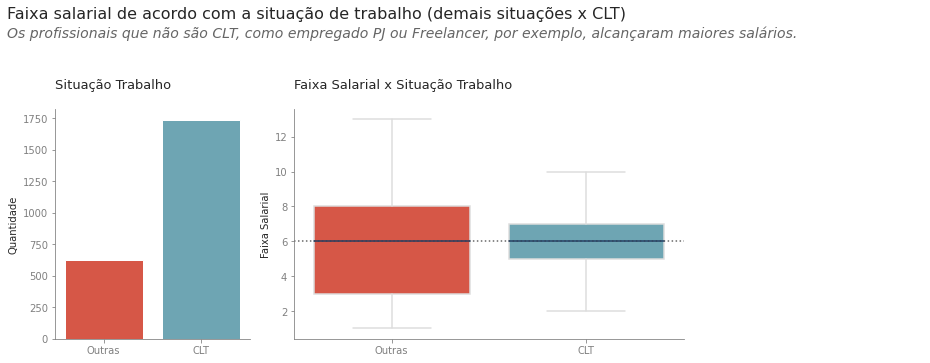

In [8]:
# Gráfico: Situação Trabalho

# Nova variável 'Situação_CLT' para realizar a comparação com as demais situações de trabalho
df["situação_CLT"] = df["('P2_a ', 'Qual sua situação atual de trabalho?')"] == "Empregado (CLT)"

eixo_x = "situação_CLT"
eixo_y = "faixa_salarial"

config_situacao = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [1,2,1], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com a situação de trabalho (demais situações x CLT)\n\n",
                'subtitulo': "Os profissionais que não são CLT, como empregado PJ ou Freelancer, por exemplo, alcançaram maiores salários."}

situacao_contagem = {'data': df,
            'eixo_x': eixo_x,
            'eixo_y': eixo_y,
            'paleta_cores': paleta_dupla,
            'titulo': "Situação Trabalho \n",
            'rotulo_x': '',
            'rotulo_y': 'Quantidade',
            'rotulo_tick_x': ['Outras','CLT']}

situacao_caixas = {'data': df,
           'eixo_x': eixo_x,
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x Situação Trabalho \n", 
           'paleta_cores': paleta_dupla,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Outras','CLT']}

grafico_situacao = Grafico(config_situacao)
grafico_situacao.grafico_contagem_comparacao(situacao_contagem, 0)
grafico_situacao.grafico_caixas_comparacao(situacao_caixas, 1)
grafico_situacao.grafico_texto('',2)

## Trabalho no Exterior
Os profissionais que trabalham para empresas localizadas no Exterior, independente de morarem no Brasil ou fora do país, receberam salários maiores. Devido a conversão em Real, recebem muito acima da média.

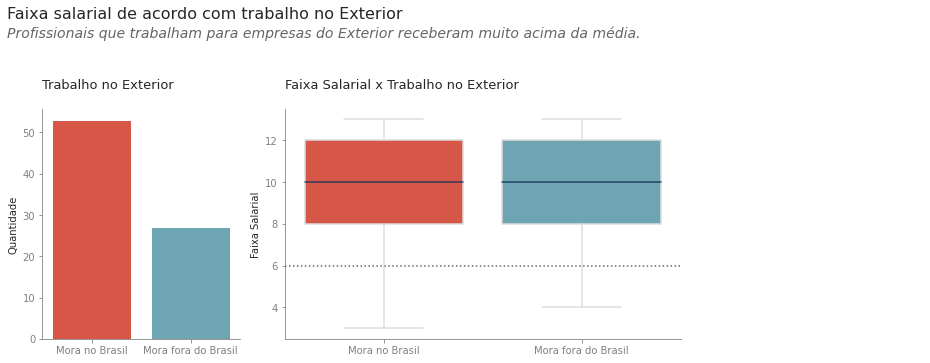

In [9]:
# Gráfico: Trabalho no Exterior

eixo_x = "('P2_a ', 'Qual sua situação atual de trabalho?')"
eixo_y = "faixa_salarial"
empresa_exterior = ['Vivo fora do Brasil e trabalho para empresa de fora do Brasil','Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)']

config_exterior = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [1,2,1], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com trabalho no Exterior\n\n",
                'subtitulo': "Profissionais que trabalham para empresas do Exterior receberam muito acima da média."}

exterior_contagem = {'data': df.loc[(df["('P2_a ', 'Qual sua situação atual de trabalho?')"].isin(empresa_exterior))],
            'eixo_x': eixo_x,
            'eixo_y': eixo_y,
            'paleta_cores': paleta_dupla,
            'titulo': "Trabalho no Exterior \n",
            'rotulo_x': '',
            'rotulo_y': 'Quantidade',
            'rotulo_tick_x': ['Mora no Brasil', 'Mora fora do Brasil']}

exterior_caixas = {'data': df.loc[(df["('P2_a ', 'Qual sua situação atual de trabalho?')"].isin(empresa_exterior))],
           'eixo_x': eixo_x,
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x Trabalho no Exterior \n", 
           'paleta_cores': paleta_dupla,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Mora no Brasil', 'Mora fora do Brasil']}

grafico_exterior = Grafico(config_exterior)
grafico_exterior.grafico_contagem_comparacao(exterior_contagem, 0)
grafico_exterior.grafico_caixas_comparacao(exterior_caixas, 1)
grafico_exterior.grafico_texto('',2)


## Setor do mercado
O setor que mais contrata profissionais na área de dados atualmente é o de Tecnologia/Fábrica de Software, seguido pelo setor Financeiro/Bancos e o setor de Varejo. Porém, identifiquei que o setor de Entretenimento/Esportes ofereceu as melhores remunerações. Quem disse que o trabalho não pode ser divertido?

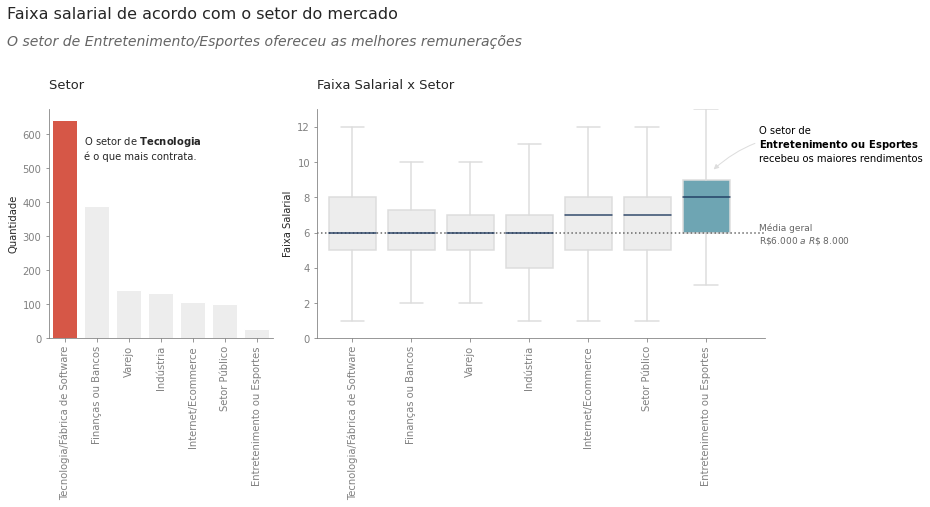

In [10]:
# Gráfico: Setor

eixo_x = "('P2_b ', 'Setor')"
eixo_y = "faixa_salarial"
ordem = ['Tecnologia/Fábrica de Software', 'Finanças ou Bancos', 'Varejo', 'Indústria', 'Internet/Ecommerce', 'Setor Público', 'Entretenimento ou Esportes']
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_setor = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,7)},
                'titulo': "Faixa salarial de acordo com o setor do mercado\n\n",
                'subtitulo': "O setor de Entretenimento/Esportes ofereceu as melhores remunerações"}

setor_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Setor \n",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 0.6,
                  'coord_anotacao_y': 559,
                  'anotacao': f"O setor de $\\bf Tecnologia$\né o que mais contrata."}

setor_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Setor \n", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (6.1, 9.5),
                  'coord_anotacao_seta': (6.9, 11),
                  'anotacao': f"O setor de \n$\\bfEntretenimento \ ou \ Esportes$ \nrecebeu os maiores rendimentos",
                  'coord_linha_media_x': 6.9,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 7),
                  'limite_y': (0, 13)}



grafico_setor = Grafico(config_setor)
grafico_setor.grafico_contagem(setor_contagem, 0)
grafico_setor.grafico_caixas(setor_caixas, 1)

## Cargo de Gestor
Os profissionais que exercem um cargo de gestão na área de dados receberam os maiores salários. <br>
Mais de 20% do profissionais entrevistados têm cargo de gestão. Aqui está a importância de adquirir capacidades além das técnicas.

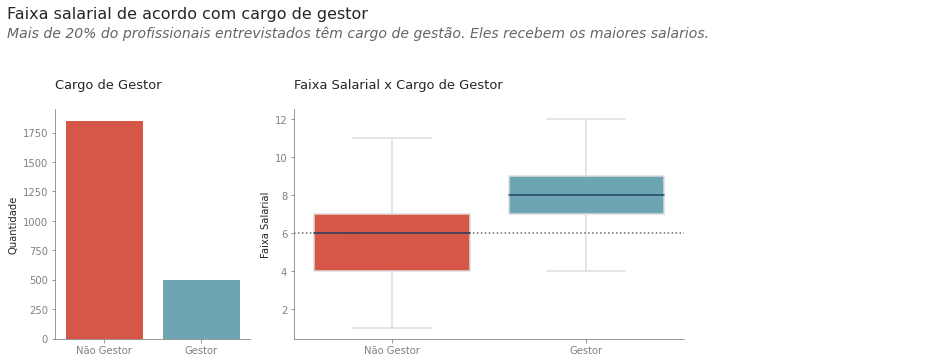

In [11]:
# Gráfico: Cargo de Gestor

eixo_x = "('P2_d ', 'Gestor?')"
eixo_y = "faixa_salarial"

config_gestor = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [1,2,1], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com cargo de gestor\n\n",
                'subtitulo': "Mais de 20% do profissionais entrevistados têm cargo de gestão. Eles recebem os maiores salarios."}

gestor_contagem = {'data': df,
            'eixo_x': eixo_x,
            'eixo_y': eixo_y,
            'paleta_cores': paleta_dupla,
            'titulo': "Cargo de Gestor \n",
            'rotulo_x': '',
            'rotulo_y': 'Quantidade',
            'rotulo_tick_x': ['Não Gestor', 'Gestor']}

gestor_caixas = {'data': df,
           'eixo_x': eixo_x,
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x Cargo de Gestor \n", 
           'paleta_cores': paleta_dupla,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Não Gestor', 'Gestor']}

grafico_gestor = Grafico(config_gestor)
grafico_gestor.grafico_contagem_comparacao(gestor_contagem, 0)
grafico_gestor.grafico_caixas_comparacao(gestor_caixas, 1)
grafico_gestor.grafico_texto('',2)


## Nível Conhecimento: Júnior, Pleno ou Sênior
Como esperado, os profissionais de nível Sênior estão nas maiores faixas salariais.

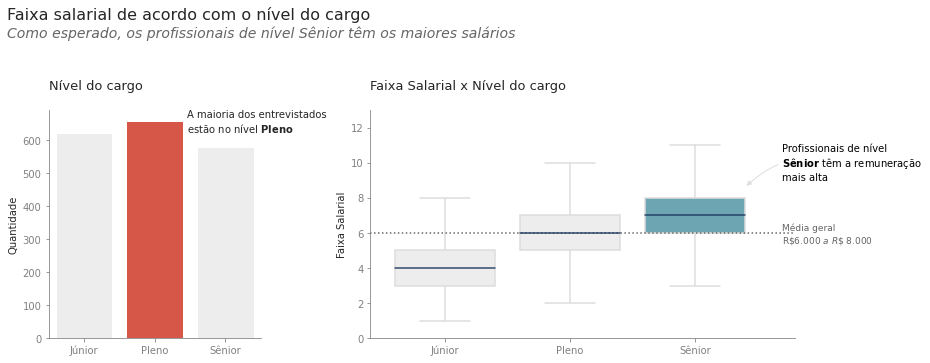

In [12]:
# Gráfico: Nível do Cargo

eixo_x = "('P2_g ', 'Nivel')"
eixo_y = "faixa_salarial"
ordem = ["Júnior","Pleno","Sênior"]
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_setor = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com o nível do cargo\n\n",
                'subtitulo': "Como esperado, os profissionais de nível Sênior têm os maiores salários"}

setor_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Nível do cargo \n",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 0,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 1.45,
                  'coord_anotacao_y': 655,
                  'anotacao': f"A maioria dos entrevistados\nestão no nível $\\bf Pleno$"}

setor_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Nível do cargo \n", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 0,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (2.4, 8.6),
                  'coord_anotacao_seta': (2.7, 10),
                  'anotacao': f"Profissionais de nível\n$\\bfSênior$ têm a remuneração \nmais alta",
                  'coord_linha_media_x': 2.7,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 2.8),
                  'limite_y': (0, 13)}



grafico_setor = Grafico(config_setor)
grafico_setor.grafico_contagem(setor_contagem, 0)
grafico_setor.grafico_caixas(setor_caixas, 1)


## Experiência na área de dados

Experiência conta muito! Seguindo a tendência natural, quanto maior a experiência, maior a remuneração.

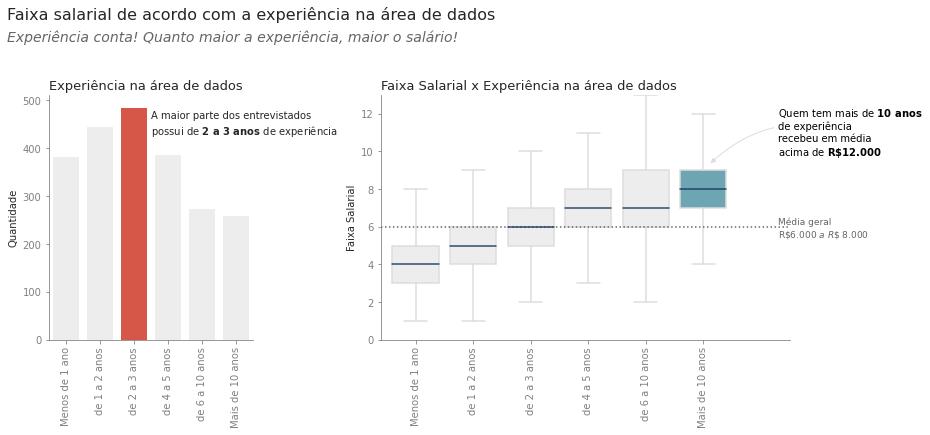

In [13]:
# Gráfico: Experiência na área de dados

# não considerando 'Não tenho experiência na área de dados'
dfExperiencia = df.loc[df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] != 'Não tenho experiência na área de dados']

eixo_x = "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"
eixo_y = "faixa_salarial"
ordem = ["Menos de 1 ano","de 1 a 2 anos","de 2 a 3 anos","de 4 a 5 anos","de 6 a 10 anos","Mais de 10 anos"]
df_agrupado = dfExperiencia.groupby(eixo_x).mean().sort_index()



config_experiencia = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com a experiência na área de dados\n\n",
                'subtitulo': "Experiência conta! Quanto maior a experiência, maior o salário!"}

experiencia_contagem = {'data': dfExperiencia,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Experiência na área de dados",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 2.5,
                  'coord_anotacao_y': 450,
                  'anotacao': f"A maior parte dos entrevistados \npossui de $\\bf 2 \ a \ 3 \ anos$ de experiência"}

experiencia_caixas = {'data': dfExperiencia,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Experiência na área de dados", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (5.1, 9.3),
                  'coord_anotacao_seta': (6.3, 11),
                  'anotacao': f"Quem tem mais de $\\bf10 \ anos$ \nde experiência \nrecebeu em média\nacima de $\\bfR\$ 12.000$",
                  'coord_linha_media_x': 6.3,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 6.5),
                  'limite_y': (0, 13)}



grafico_experiencia = Grafico(config_experiencia)
grafico_experiencia.grafico_contagem(experiencia_contagem, 0)
grafico_experiencia.grafico_caixas(experiencia_caixas, 1)

## Modelo de trabalho
Dentre os modelos de trabalho *totalmente remoto*, *híbrido (presencial e remoto) flexível*, *totalmente presencial* e *híbrido (presencial e remoto) com dias fixos*, quem trabalhou no modelo *híbrido flexível* recebeu os melhores salários. O conceito de trabalho remoto se espalhou no mercado corporativo, especialmente no setor de tecnologia.

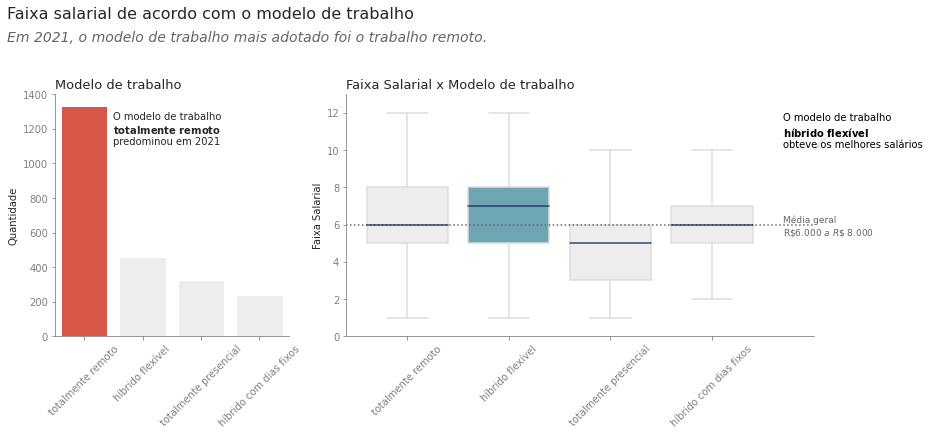

In [14]:
# Gráfico: Modelo de trabalho

# Renomeando as categorias
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo 100% remoto', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'totalmente remoto'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'híbrido flexível'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo 100% presencial', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'totalmente presencial'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo híbrido com dias fixos de trabalho presencial', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'híbrido com dias fixos'


eixo_x = "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"
eixo_y = "faixa_salarial"
ordem = df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts().index
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_modelo = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com o modelo de trabalho\n\n",
                'subtitulo': "Em 2021, o modelo de trabalho mais adotado foi o trabalho remoto."}

modelo_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Modelo de trabalho",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 45,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 0.5,
                  'coord_anotacao_y': 1200,
                  'anotacao': f"O modelo de trabalho \n$\\bf totalmente \ remoto$\npredominou em 2021"}

modelo_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Modelo de trabalho", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 45,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (4, 9.9),
                  'coord_anotacao_seta': (3.7, 11),
                  'anotacao': f"O modelo de trabalho \n$\\bfhíbrido \ flexível$ \nobteve os melhores salários",
                  'coord_linha_media_x': 3.7,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 4),
                  'limite_y': (0, 13)}



grafico_modelo = Grafico(config_modelo)
grafico_modelo.grafico_contagem(modelo_contagem, 0)
grafico_modelo.grafico_caixas(modelo_caixas, 1)

# <font color="#1B365C">Conhecimentos técnicos na área de dados</font>

## Área de Atuação

Comparando a remuneração das principais áreas de atuação do mercado:  
  **Analista de Dados**, **Cientista de Dados** e **Engenheiro de Dados**.

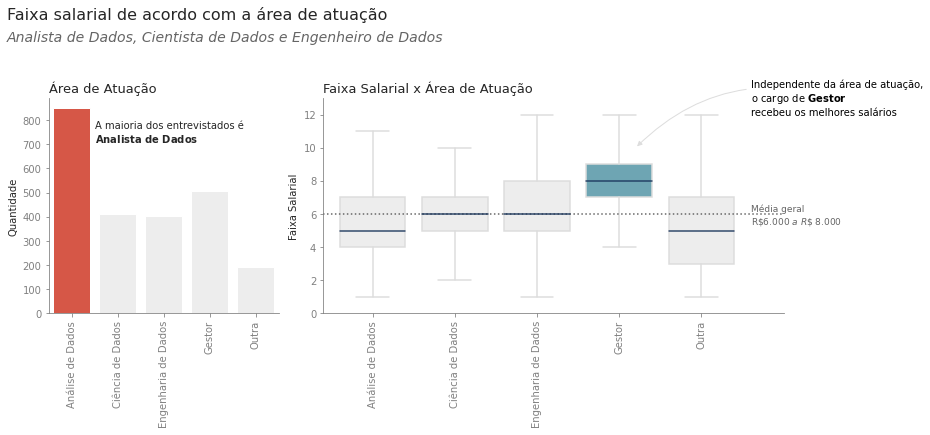

In [15]:
#Gráfico: Área de Atuação

eixo_x = "('P4_a ', 'Atuacao')"
eixo_y = "faixa_salarial"
ordem = ["Análise de Dados","Ciência de Dados","Engenharia de Dados","Gestor","Outra"]
df_agrupado = df.groupby(eixo_x).mean().sort_index()



config_atuacao = {'figura': {'linhas': 1, 'colunas': 2, 'proporcao': [2,4], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com a área de atuação\n\n",
                'subtitulo': "Analista de Dados, Cientista de Dados e Engenheiro de Dados"}

atuacao_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Área de Atuação",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 0.5,
                  'coord_anotacao_y': 750,
                  'anotacao': f"A maioria dos entrevistados é \n$\\bf Analista \ de \ Dados$"}

atuacao_caixas = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,  
                  'titulo': "Faixa Salarial x Área de Atuação", 
                  'rotulo_x': '',
                  'rotulo_y': 'Faixa Salarial',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df_agrupado[eixo_y][ordem],
                  'coord_anotacao_xy': (3.2, 10),
                  'coord_anotacao_seta': (4.6, 13),
                  'anotacao': f"Independente da área de atuação,\no cargo de $\\bfGestor$ \nrecebeu os melhores salários",
                  'coord_linha_media_x': 4.6,
                  'coord_linha_media_y': 5.9,
                  'limite_x': (-0.6, 5),
                  'limite_y': (0, 13)}



grafico_atuacao = Grafico(config_atuacao)
grafico_atuacao.grafico_contagem(atuacao_contagem, 0)
grafico_atuacao.grafico_caixas(atuacao_caixas, 1)


## Linguagens
  
Entre as linguagens de programação listadas, Python e SQL foram quase unanimidades entre os entrevistados que trabalham na área de dados. Porém, o conhecimento destas linguagens não é mais um diferencial em relação ao salário. Na contramão, quem informou na pesquisa que utiliza a linguagem R no trabalho, recebeu salários abaixo da média.

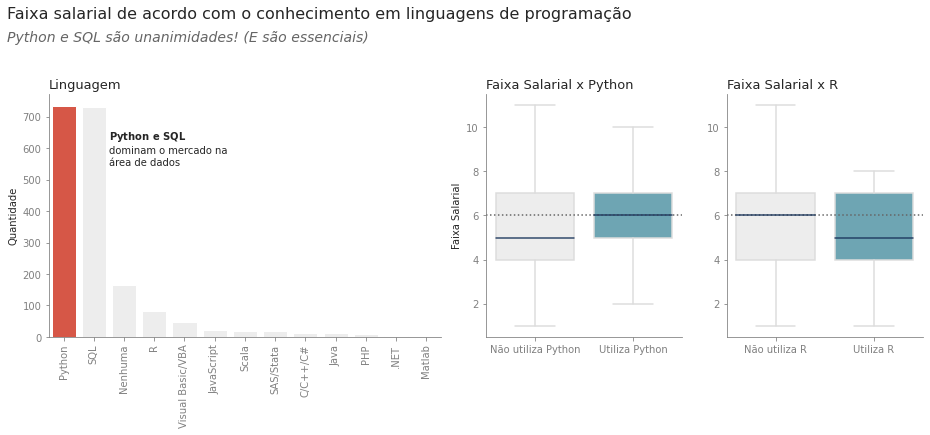

In [16]:
#Gráfico: Linguagem

# Renomeando a descrição do valor da variável 'P4_e '
df.loc[df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"] == 'Não utilizo nenhuma das linguagens listadas', "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"] = 'Nenhuma'

eixo_x = "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"
eixo_y = "faixa_salarial"
ordem = df[eixo_x].value_counts().index

config_linguagem = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [2,1,1], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com o conhecimento em linguagens de programação\n\n",
                'subtitulo': "Python e SQL são unanimidades! (E são essenciais)"}

linguagem_contagem = {'data': df,
                  'eixo_x': eixo_x,
                  'eixo_y': eixo_y,
                  'ordem': ordem,
                  'titulo': "Linguagem",
                  'rotulo_x': '',
                  'rotulo_y': 'Quantidade',
                  'rotacao_texto_x': 90,
                  'paleta_cores': df[eixo_x].value_counts()[ordem],
                  'coord_anotacao_x': 1.5,
                  'coord_anotacao_y': 600,
                  'anotacao': f"$\\bfPython \ e \ SQL$\ndominam o mercado na \nárea de dados"}

linguagemPython = {'data': df,
                   'eixo_x': df["('P4_e_c ', 'Python')"],
                   'eixo_y': eixo_y,
                   'titulo': "Faixa Salarial x Python", 
                   'paleta_cores': other_color + max_color1,
                   'rotulo_x': '',
                   'rotulo_y': 'Faixa Salarial',
                   'rotulo_tick_x': ['Não utiliza Python', 'Utiliza Python']}

linguagemR = {'data': df,
           'eixo_x': df["('P4_e_b ', 'R ')"],
           'eixo_y': "faixa_salarial",
           'titulo': "Faixa Salarial x R", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': '',
           'rotulo_tick_x': ['Não utiliza R', 'Utiliza R']}

grafico_linguagem = Grafico(config_linguagem)
grafico_linguagem.grafico_contagem(linguagem_contagem, 0)
grafico_linguagem.grafico_caixas_comparacao(linguagemPython,1)
grafico_linguagem.grafico_caixas_comparacao(linguagemR,2)


### Comparativo entre SQL x Python x R
Apresento abaixo um conjunto comparativo entre os profissionais entrevistados em relação as principais linguagens do mercado quando o assunto é a área de dados.

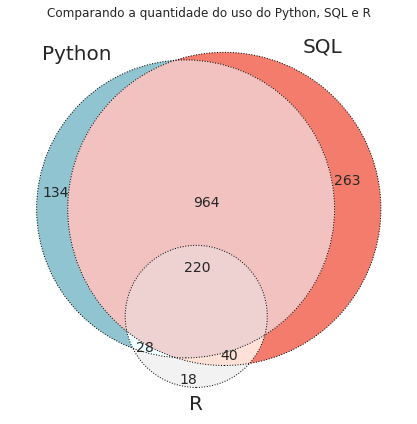

In [17]:
# Comparativo entre SQL x Python x R

dfA, dfB, dfC = df["('P4_d_c ', 'Python')"], df["('P4_d_a ', 'SQL')"], df["('P4_d_b ', 'R ')"]

# quantidade total de 'a', 'b' e 'c'
qt_a = int(dfA.sum())
qt_b = int(dfB.sum())
qt_c = int(dfC.sum())

# intersecção 'a', 'b' e 'c'
qt_a_b_c = len(df.loc[(dfA == 1.00) & 
                      (dfC == 1.00) & 
                      (dfB == 1.00), :])

# intersecção 'a' e 'b'
qt_a_b = len(df.loc[(dfA == 1.00) & (dfB == 1.00), :])
qt_a_b = qt_a_b - qt_a_b_c

# intersecção 'b' e 'c'
qt_b_c = len(df.loc[(dfC == 1.00) & (dfB == 1.00), :])
qt_b_c = qt_b_c - qt_a_b_c

# intersecção 'a' e 'c'
qt_a_c = len(df.loc[(dfA == 1.00) & (dfC == 1.00), :])
qt_a_c = qt_a_c - qt_a_b_c

# cálculo para exibição nos conjuntos
qt_a = qt_a - qt_a_b - qt_a_c - qt_a_b_c
qt_b = qt_b - qt_a_b - qt_b_c - qt_a_b_c
qt_c = qt_c - qt_a_c - qt_b_c - qt_a_b_c

# Comparativo entre SQL x Python x R

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
  
# definindo os conjuntos
conjunto = venn3(subsets=(qt_a, qt_b, qt_a_b, qt_c, qt_a_c, qt_b_c, qt_a_b_c), 
      set_labels=('Python', 'SQL', 'R'), 
      set_colors=("#63ACBE", "#EE442F", "#EDEDED"), alpha=0.7)
# estilo dos conjuntos
venn3_circles(subsets=(qt_a, qt_b, qt_a_b, qt_c, qt_a_c, qt_b_c, qt_a_b_c), 
              linestyle="dotted", linewidth=1)

for text in conjunto.set_labels:
    text.set_fontsize(20)
for x in range(len(conjunto.subset_labels)):
    if conjunto.subset_labels[x] is not None:
        conjunto.subset_labels[x].set_fontsize(14)
    
    
# título do gráfico de conjuntos
plt.title("Comparando a quantidade do uso do Python, SQL e R")
plt.show()

## Fontes de Dados
  
As fontes de dados relacionais/tabulares são atualmente mais utilizadas em relação às não relacionais (NoSQL). Todavia, quem trabalha com fontes de dados não relacionais, obteve as maiores remunerações.

In [18]:
# preparação e configuração das colunas referente as fontes de dados
colunas_fonte_dados = [coluna for coluna in df.columns if 'P4_c_' in coluna]
dfFonteDados = df.loc[:, colunas_fonte_dados]

# regex utilizado para renomear nome das colunas para o novo DataFrame
pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_fonte_dados = {}

for coluna in colunas_fonte_dados:
    dfFonteDados[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_fonte_dados[nome_coluna] = dfFonteDados[coluna].sum()


dicio_fonte_dados["Dados relacionais-SQL"] = dicio_fonte_dados["Dados relacionais (estruturados em bancos SQL)"]
del dicio_fonte_dados["Dados relacionais (estruturados em bancos SQL)"]

# dicionário para DataFrame
dfFonteDados = pd.DataFrame(list(dicio_fonte_dados.items()),columns = ['Fonte de Dados','Quantidade']) 

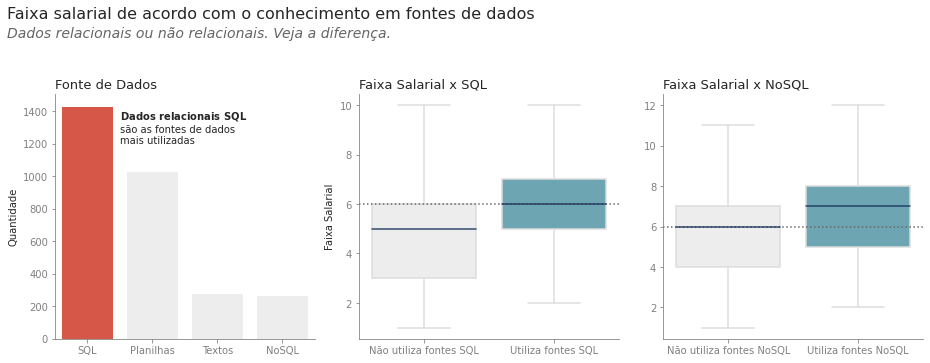

In [19]:
#Gráfico: Fonte de Dados

eixo_x = "Fonte de Dados"
eixo_y = "faixa_salarial"

config_fonte = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [1,1,1], 'tamanho': (13,5)},
                'titulo': "Faixa salarial de acordo com o conhecimento em fontes de dados\n\n",
                'subtitulo': "Dados relacionais ou não relacionais. Veja a diferença."}

fonte_barras = {'data': dfFonteDados.sort_values(by='Quantidade', ascending=False).head(4),
                'eixo_x': eixo_x,
                'eixo_y': "Quantidade",
                'paleta_cores': max_color0 + other_color*3,
                'titulo': "Fonte de Dados",
                'rotulo_x': '',
                'rotulo_y': 'Quantidade',
                'rotulo_texto_x': ['SQL', 'Planilhas', 'Textos', 'NoSQL'],
                'rotacao_texto_x': 0,
                'coord_anotacao_x': 0.5,
                'coord_anotacao_y': 1300,
                'anotacao': f"$\\bfDados \ relacionais \ SQL$\nsão as fontes de dados \nmais utilizadas"}
        

fonteSQL = {'data': df,
           'eixo_x': df["('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')"],
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x SQL", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Não utiliza fontes SQL', 'Utiliza fontes SQL']}

fonteNoSQL = {'data': df,
           'eixo_x': df["('P4_c_b ', 'Dados armazenados em bancos NoSQL')"],
           'eixo_y': "faixa_salarial",
           'titulo': "Faixa Salarial x NoSQL", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': '',
           'rotulo_tick_x': ['Não utiliza fontes NoSQL', 'Utiliza fontes NoSQL']}

grafico_fonte = Grafico(config_fonte)
grafico_fonte.grafico_barras(fonte_barras, 0)
grafico_fonte.grafico_caixas_comparacao(fonteSQL,1)
grafico_fonte.grafico_caixas_comparacao(fonteNoSQL,2)

## Bancos de Dados
  
O sistema gerenciador de Banco de Dados mais utilizado foi o *SQL Server*,seguido do *PostgreSQL* e *MySQL*. <br>
No entanto, como demonstrado acima, quem trabalha com fonte de dados não relacionais, recebeu os maiores salários. <br>
Dou destaque para o *MongDB* como um dos principais programas de Banco de Dados não relacionais (NoSQL).

In [20]:
# preparação e configuração das colunas referente aos Banco de Dados

colunas_banco_dados = [coluna for coluna in df.columns if 'P4_f_' in coluna]
dfBancoDados = df.loc[:, colunas_banco_dados]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_banco_dados = {}

for coluna in colunas_banco_dados:
    dfBancoDados[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_banco_dados[nome_coluna] = dfBancoDados[coluna].sum()

# dicionário para DataFrame
dfBancoDados = pd.DataFrame(list(dicio_banco_dados.items()),columns = ['Banco de Dados','Quantidade']) 

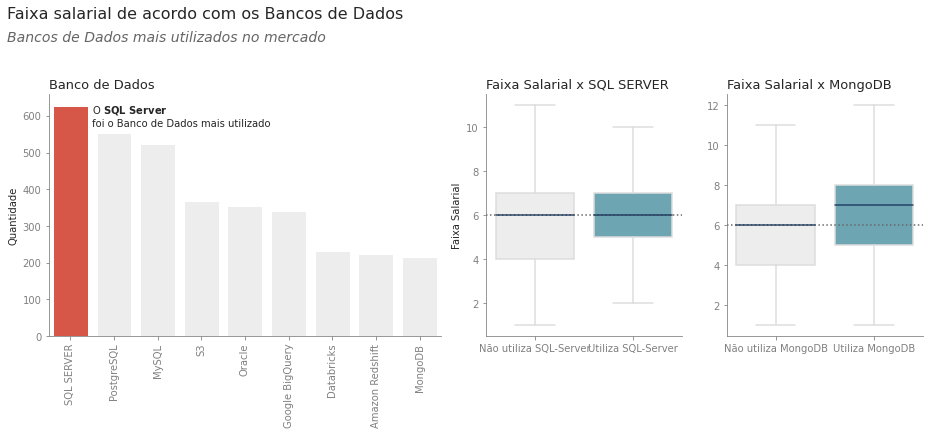

In [21]:
#Gráfico: Bancos de Dados


eixo_x = "Banco de Dados"
eixo_y = "faixa_salarial"


config_bd = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [2,1,1], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com os Bancos de Dados\n\n",
                'subtitulo': "Bancos de Dados mais utilizados no mercado"}

bd_barras = {'data': dfBancoDados.sort_values(by='Quantidade', ascending=False).head(9),
                'eixo_x': eixo_x,
                'eixo_y': "Quantidade",
                'paleta_cores': max_color0 + other_color*8,
                'titulo': "Banco de Dados",
                'rotulo_x': '',
                'rotulo_y': 'Quantidade',
                'rotulo_texto_x': ['SQL SERVER','PostgreSQL','MySQL','S3','Oracle','Google BigQuery','Databricks','Amazon Redshift','MongoDB'],
                'rotacao_texto_x': 90,
                'coord_anotacao_x': 0.5,
                'coord_anotacao_y': 600,
                'anotacao': f"O $\\bf SQL \ Server$\nfoi o Banco de Dados mais utilizado"}
 

bdSQL = {'data': df,
           'eixo_x': df["('P4_f_c ', 'SQL SERVER')"],
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x SQL SERVER", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Não utiliza SQL-Server', 'Utiliza SQL-Server']}

bdMongo = {'data': df,
           'eixo_x': df["('P4_f_i ', 'MongoDB')"],
           'eixo_y': "faixa_salarial",
           'titulo': "Faixa Salarial x MongoDB", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': '',
           'rotulo_tick_x': ['Não utiliza MongoDB', 'Utiliza MongoDB']}

grafico_bd = Grafico(config_bd)
grafico_bd.grafico_barras(bd_barras, 0)
grafico_bd.grafico_caixas_comparacao(bdSQL,1)
grafico_bd.grafico_caixas_comparacao(bdMongo,2)



## Clouds

As plataformas de serviços de computação em nuvem mais utilizadas foram: Amazon Web Services (AWS), seguida pela Azure (Microsoft) e Google Cloud Platform. <br>
Não houve diferença em relação as faixas salariais devido ao uso dessas plataformas.

In [22]:
# preparação e configuração das colunas referente a Clouds
colunas_cloud = [coluna for coluna in df.columns if 'P4_g_' in coluna]
dfCloud = df.loc[:, colunas_cloud]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_cloud = {}

for coluna in colunas_cloud:
    dfCloud[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_cloud[nome_coluna] = dfCloud[coluna].sum()

dfCloud = pd.DataFrame(list(dicio_cloud.items()),columns = ['Cloud','Quantidade']) 

dfCloud.loc[dfCloud["Cloud"] == 'Servidores On Premise/Não utilizamos Cloud', "Cloud"] = 'Nenhuma'

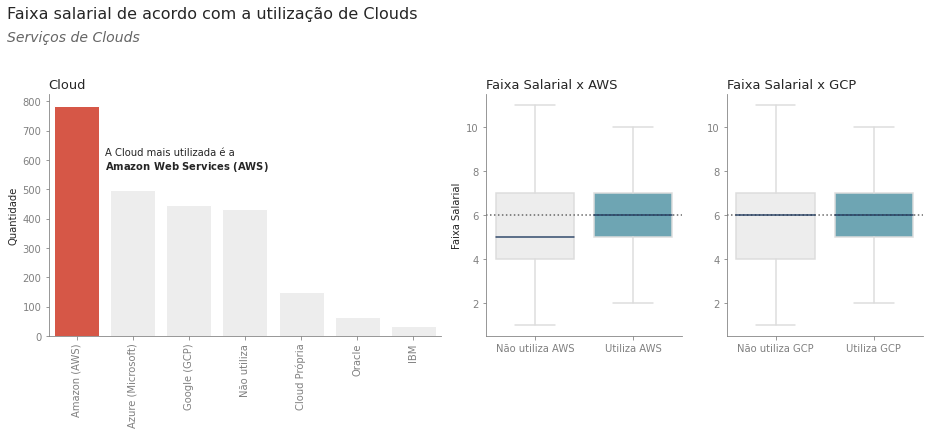

In [23]:
#Gráfico: Clouds


eixo_x = "Cloud"
eixo_y = "faixa_salarial"


config_cloud = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [2,1,1], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com a utilização de Clouds\n\n",
                'subtitulo': "Serviços de Clouds"}

cloud_barras = {'data': dfCloud.sort_values(by='Quantidade', ascending=False),
                'eixo_x': eixo_x,
                'eixo_y': "Quantidade",
                'paleta_cores': max_color0 + other_color*6,
                'titulo': "Cloud",
                'rotulo_x': '',
                'rotulo_y': 'Quantidade',
                'rotulo_texto_x': ['Amazon (AWS)', 'Azure (Microsoft)', 'Google (GCP)', 'Não utiliza', 'Cloud Própria', 'Oracle', 'IBM'],
                'rotacao_texto_x': 90,
                'coord_anotacao_x': 0.5,
                'coord_anotacao_y': 600,
                'anotacao': f"A Cloud mais utilizada é a\n$\\bfAmazon \ Web \ Services \ (AWS)$"}
 



cloudAWS = {'data': df,
           'eixo_x': df["('P4_g_a ', 'Amazon Web Services (AWS)')"],
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x AWS", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Não utiliza AWS', 'Utiliza AWS']}

cloudGCP = {'data': df,
           'eixo_x': df["('P4_g_b ', 'Google Cloud (GCP)')"],
           'eixo_y': "faixa_salarial",
           'titulo': "Faixa Salarial x GCP", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': '',
           'rotulo_tick_x': ['Não utiliza GCP', 'Utiliza GCP']}

grafico_cloud = Grafico(config_cloud)
grafico_cloud.grafico_barras(cloud_barras, 0)
grafico_cloud.grafico_caixas_comparacao(cloudAWS,1)
grafico_cloud.grafico_caixas_comparacao(cloudGCP,2)

## Ferramentas BI
  
O serviço de Inteligência de Negócios e visualização de dados mais utilizado foi o *Microsoft Power BI*, acompanhado do *Tableau Software* e *Google Data Studio*. <br>
Não foi observada diferenças salariais pela utilização de Ferramentas BI.

In [24]:
# preparação e configuração das colunas referente a Ferramentas BI
colunas_bi = [coluna for coluna in df.columns if 'P4_h_' in coluna]
dfBi = df.loc[:, colunas_bi]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_bi = {}

for coluna in colunas_bi:
    dfBi[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_bi[nome_coluna] = dfBi[coluna].sum()

dfBi = pd.DataFrame(list(dicio_bi.items()),columns = ['Ferramentas BI','Quantidade']) 

dfBi.loc[dfBi["Ferramentas BI"] == 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google', "Ferramentas BI"] = 'Excel ou Planilhas'
dfBi.loc[dfBi["Ferramentas BI"] == 'Não utilizo nenhuma ferramenta de BI no trabalho', "Ferramentas BI"] = 'Nenhuma'


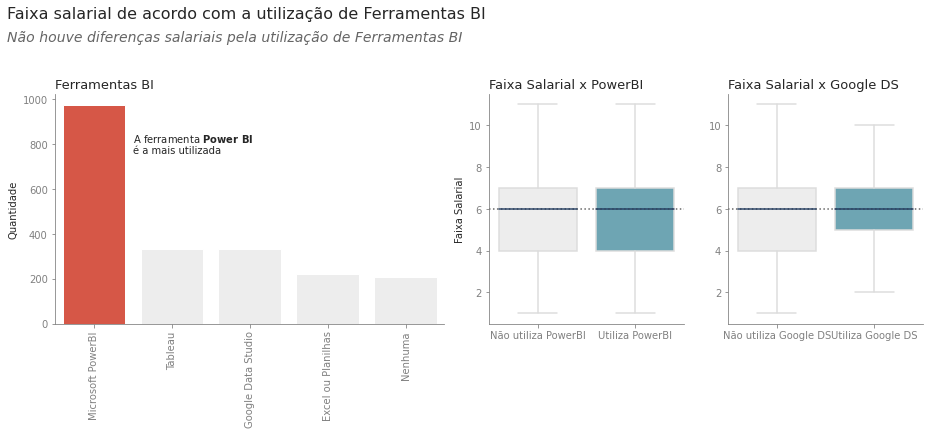

In [25]:
#Gráfico: Ferramentas BI

eixo_x = "Ferramentas BI"
eixo_y = "faixa_salarial"


config_bi = {'figura': {'linhas': 1, 'colunas': 3, 'proporcao': [2,1,1], 'tamanho': (13,6)},
                'titulo': "Faixa salarial de acordo com a utilização de Ferramentas BI\n\n",
                'subtitulo': "Não houve diferenças salariais pela utilização de Ferramentas BI"}

bi_barras = {'data': dfBi.sort_values(by='Quantidade', ascending=False).head(5),
                'eixo_x': eixo_x,
                'eixo_y': "Quantidade",
                'paleta_cores': max_color0 + other_color*4,
                'titulo': "Ferramentas BI",
                'rotulo_x': '',
                'rotulo_y': 'Quantidade',
                'rotulo_texto_x': ['Microsoft PowerBI','Tableau','Google Data Studio','Excel ou Planilhas','Nenhuma'],
                'rotacao_texto_x': 90,
                'coord_anotacao_x': 0.5,
                'coord_anotacao_y': 800,
                'anotacao': f"A ferramenta $\\bf Power \ BI $\né a mais utilizada"}



biPower = {'data': df,
           'eixo_x': df["('P4_h_a ', 'Microsoft PowerBI')"],
           'eixo_y': eixo_y,
           'titulo': "Faixa Salarial x PowerBI", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': 'Faixa Salarial',
           'rotulo_tick_x': ['Não utiliza PowerBI', 'Utiliza PowerBI']}

biGoogle = {'data': df,
           'eixo_x': df["('P4_h_q ', 'Google Data Studio')"],
           'eixo_y': "faixa_salarial",
           'titulo': "Faixa Salarial x Google DS", 
           'paleta_cores': other_color + max_color1,
           'rotulo_x': '',
           'rotulo_y': '',
           'rotulo_tick_x': ['Não utiliza Google DS', 'Utiliza Google DS']}

grafico_bi = Grafico(config_bi)
grafico_bi.grafico_barras(bi_barras, 0)
grafico_bi.grafico_caixas_comparacao(biPower,1)
grafico_bi.grafico_caixas_comparacao(biGoogle,2)

# <font color="#1B365C">Calculadora de Faixa Salarial</font>
Com base nos dados da pesquisa State of Data 2021, desenvolvi uma ferramenta (Machine Learning) para calcular uma estimativa da Faixa Salarial baseada nas informações dos Dados Demográficos, Conhecimento na Área de Dados e Conhecimentos Técnicos.   

Preencha os campos abaixo e depois clique no botão para estimar a Faixa Salarial! 

In [26]:
# Informações sobre este projeto de Machine Learning:
# Utilizei a biblioteca Streamlit e o deploy na plataforma Heroku
# O algoritmo de classificação utilizado foi o de Regressão Logística 
# Maiores detalhes em: https://github.com/luizweb/stateofdata2021

from IPython.display import IFrame
url = "https://faixasalarial.herokuapp.com/"
IFrame(url, width=1000, height=1200)

--------
# <font color="#1B365C">Conclusões</font>



**Um caminho para os melhores salários:** <br>

<p>Uma formação acadêmica na área é considerável, porém foi observado que profissionais que não possuem graduação formal receberam salários algumas vezes maiores que profissionais que a possuem. Se você já possui graduação na área e está procurando os maiores salários, pode cogitar a possibilidade de investir em uma pós-graduação ou mestrado.

<p>Se trabalhar fora do regime CLT não for um problema, pode-se alcançar maiores salários trabalhando como empregado PJ ou Freelancer.</p>

<p>Aprenda ou desenvolva o seu inglês e trabalhe para uma empresa no Exterior. Lá os salários foram muito acima da média.</p>

<p>Quem disse que o trabalho não pode ser divertido? Um dos setores que apresentou melhores salários foi o de Entretenimento/Esportes.</p>

<p>Desenvolva suas competências em liderança e procure alcançar um cargo de Gestor.</p>

<p>Não pare de estudar! Trabalhe depois do trabalho. <br>
   A experiência com o tempo é muito importante para obter as melhores remunerações.</p>

<p>Os profissionais de Ciência de Dados e Engenheiro de Dados apresentaram salários superiores aos de Analistas de Dados.</p>

<p>Saber Python e/ou SQL não é um diferencial para receber mais. Elas são as linguagens essenciais para o trabalho na área de dados. Além de aprender a trabalhar com uma fonte de dados relacional, desenvolva também habilidades com fontes não estruturadas. Aprenda a trabalhar com documentos de bancos de dados MongoDB, por exemplo. </p>


### Resumindo

**Os maiores salários estão aqui:**<br>
- Faixa etária entre 45 e 49 anos;
- No Brasil, moradores da região Sudeste apresentam maiores salários;
- A remuneração é maior para os profissionais que trabalham para empresas do Exterior, independente se moram ou não no Brasil;
- Profissionais com Pós-graduação/Mestrado/Doutorado apresentaram remuneração superior aos dos que possuem ou não Graduação/Bacharelado;
- O setor que apresentou a melhor remuneração foi o de Entretenimento/Esportes seguido de Ecommerce e Setor Público;
- Pessoas com cargo de Gestor apresentam salários superiores aos que não possuem cargo de gestão;
- Profissionais de nível Sênior apresentam maiores salários;
- A experiência na área de dados apresenta-se proporcional ao valor da remuneração. Quanto maior a experiência, maior o salário.
- O modelo de trabalho que apresentou melhor remuneração foi o híbrido com dias flexíveis de trabalho presencial;
- Cientista de Dados e Engenheiro de Dados apresentam salários superiores aos Analistas de Dados;
- Profissionais que trabalham com fonte de dados não relacionais (NoSQL) apresentaram remuneração pouco superior aos que trabalham com fonte de dados relacionais (SQL);
- As linguagens mais utilizadas pelos respondentes foram o Python e o SQL;
- O Banco de Dados mais utilizado foi o SQL Server. Profissionais que trabalham com MongoDB apresentaram remuneração pouco superior;
- A remuneração dos profissionais que trabalham com Cloud, principalmente AWS, Azure e Google, é semelhante;
- Também é semelhante a remuneração dos profissionais que utilizam ferramentas BI, principalmente PowerBI, Tableau e Google Data Studio.

<br>
<p style="color:gray;font-size:11px;"><i>“O heroísmo do trabalho está em 'acabar' cada tarefa.” (Sulco, 488)</i></p>

<hr color="#F5F5F5" size="1">

*Crédito da imagem utilizada na introdução*: https://www.freepik.com/vectors/business-investment <br>
*A paleta de cores escolhida é acessível*: https://color.adobe.com/pt/create/color-accessibility 
